# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [1]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,All My Life (feat. J. Cole),"J. Cole, Lil Durk",2,2023,5,12,2175,23,144565150,69,...,143,D#,Major,83,69,44,15,0,10,33
96,Say Yes To Heaven,Lana Del Rey,1,2023,3,17,2000,46,127567540,49,...,100,F#,Minor,49,17,35,71,9,11,3
97,Snooze,SZA,1,2022,12,9,2839,25,399686758,58,...,143,F,Major,56,39,55,14,0,11,13
98,Summertime Sadness,Lana Del Rey,1,2011,1,1,20333,52,983637508,89,...,112,C#,Minor,56,24,66,7,0,12,3


<Axes: ylabel='Frequency'>

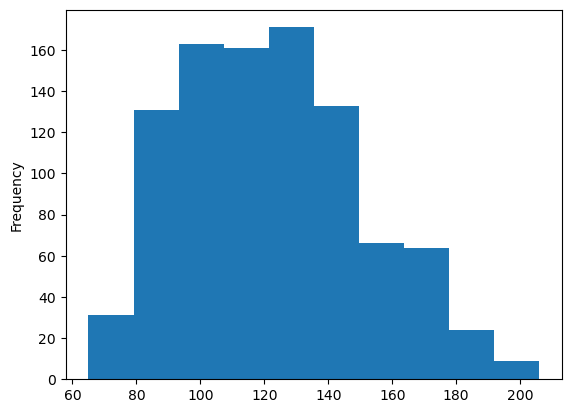

In [2]:
df['bpm'].plot(kind='hist')

In [2]:
df['bpm'].describe()

count    953.000000
mean     122.540399
std       28.057802
min       65.000000
25%      100.000000
50%      121.000000
75%      140.000000
max      206.000000
Name: bpm, dtype: float64

<Axes: ylabel='count'>

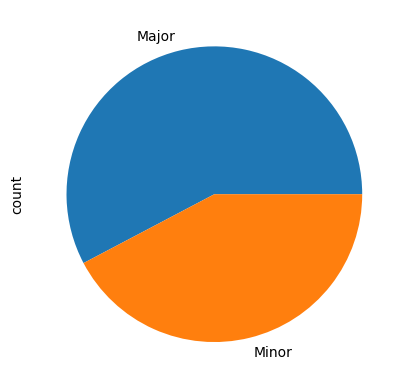

In [3]:
df['mode'].value_counts().plot(kind='pie')

In [4]:
df['mode'].value_counts()

mode
Major    550
Minor    403
Name: count, dtype: int64

In [4]:

filtered_df = df.loc[(df['bpm'] >= 85) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
194,Shut up My Moms Calling,Hotel Ugly,1,2020,2,10,1788,14,405136812,1,...,139,A,Minor,48,37,41,32,0,10,10


Dataset shape: (953, 24)

First few rows:
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0   

C:\Users\nrmyc\AppData\Local\Temp\ipykernel_36320\4072735006.py:105: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[3, 1].boxplot(data_for_boxplot.values, labels=quantitative_features, vert=True)


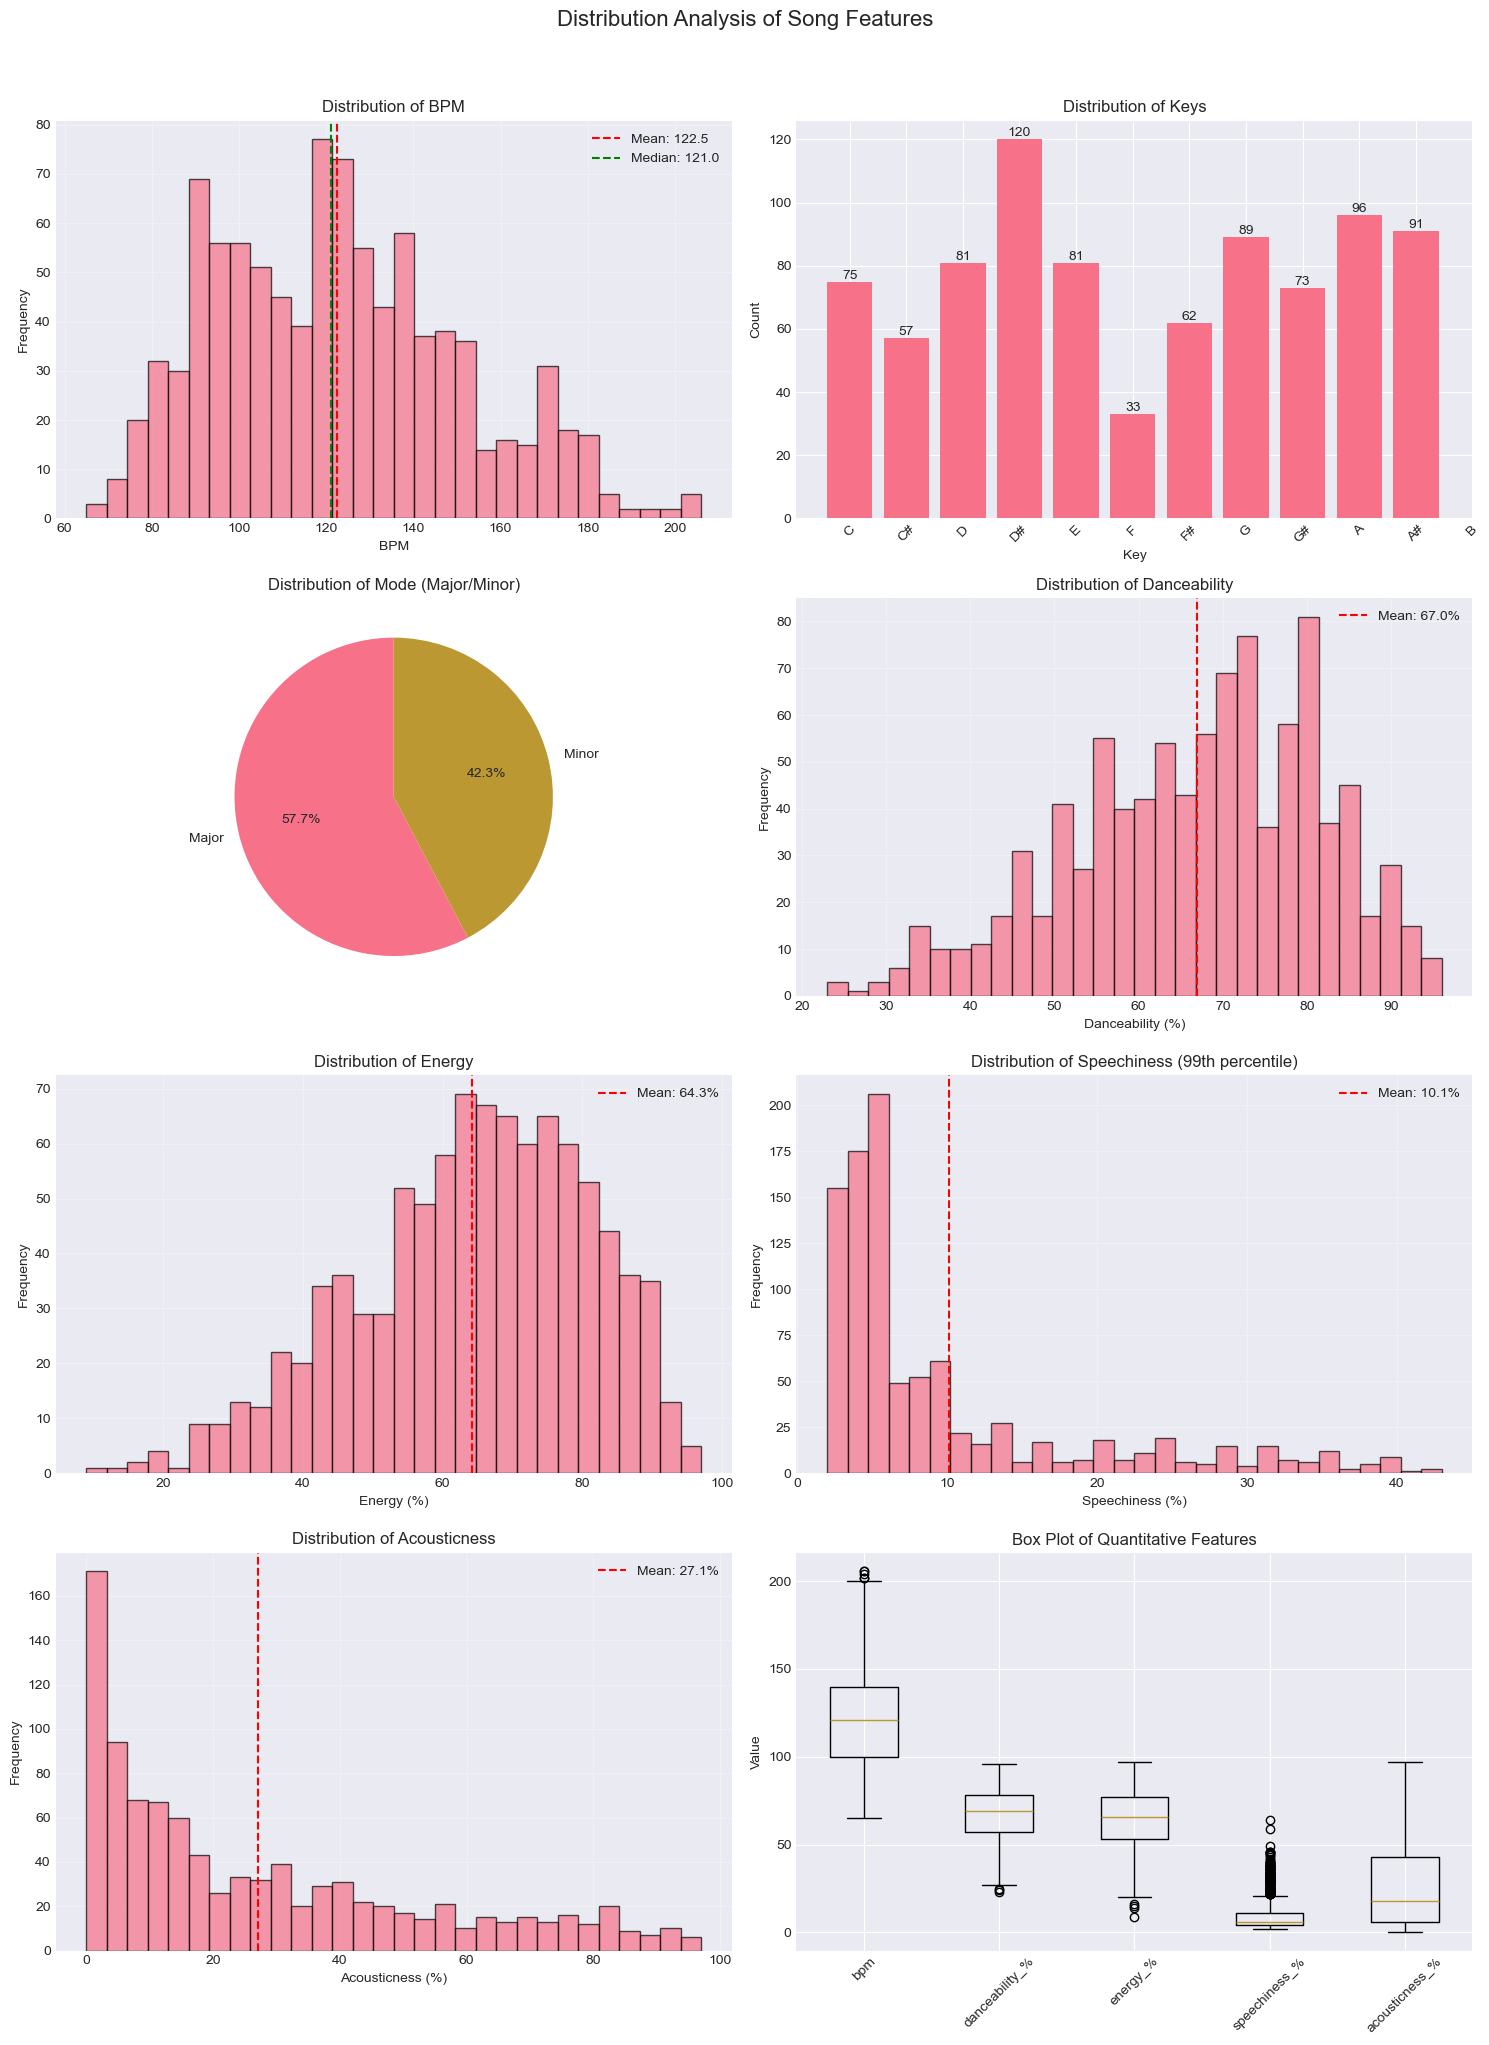

DATA-DRIVEN HIT SONG RECIPE

1. BPM ANALYSIS:
   Mean BPM: 122.5
   Median BPM: 121.0
   Most common range (25th-75th percentile): 100 - 140 BPM
   Most frequent BPM range: (121.4, 135.5]

2. KEY ANALYSIS:
   Most common key: A (75 songs)

3. MODE ANALYSIS:
   Most common mode: Major (57.7% of songs)

4. DANCEABILITY ANALYSIS:
   Mean: 67.0%
   Recommended range: 57% - 78%

5. ENERGY ANALYSIS:
   Mean: 64.3%
   Recommended range: 53% - 77%

6. SPEECHINESS ANALYSIS:
   Mean (excluding outliers): 8.6%
   Recommended range: 4% - 10%

7. ACOUSTICNESS ANALYSIS:
   Mean: 27.1%
   Recommended range: 6% - 43%

OPTIMAL RANGES FOR A HIT SONG:
BPM: 100 - 140 (centered around 121)
Key: A
Mode: Major
Danceability: 57% - 78%
Energy: 53% - 77%
Speechiness: 4% - 10%
Acousticness: 6% - 43%

SONGS MATCHING OPTIMAL CHARACTERISTICS:

Top 10 songs matching optimal characteristics:
                                                                track_name                                              artist(

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# Clean column names (remove any leading/trailing spaces)
df.columns = df.columns.str.strip()

# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Create subplots for distributions
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Distribution Analysis of Song Features', fontsize=16, y=1.02)

# 1. BPM Distribution
axes[0, 0].hist(df['bpm'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['bpm'].mean(), color='red', linestyle='--', label=f'Mean: {df["bpm"].mean():.1f}')
axes[0, 0].axvline(df['bpm'].median(), color='green', linestyle='--', label=f'Median: {df["bpm"].median():.1f}')
axes[0, 0].set_xlabel('BPM')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of BPM')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Calculate BPM statistics
bpm_q1 = df['bpm'].quantile(0.25)
bpm_q3 = df['bpm'].quantile(0.75)
bpm_iqr = bpm_q3 - bpm_q1

# 2. Key Distribution
key_counts = df['key'].value_counts().sort_index()
keys = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
axes[0, 1].bar(range(len(key_counts)), key_counts.values)
axes[0, 1].set_xticks(range(len(keys)))
axes[0, 1].set_xticklabels(keys, rotation=45)
axes[0, 1].set_xlabel('Key')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Distribution of Keys')
for i, v in enumerate(key_counts.values):
    axes[0, 1].text(i, v, str(v), ha='center', va='bottom')

# 3. Mode Distribution
mode_counts = df['mode'].value_counts()
axes[1, 0].pie(mode_counts.values, labels=mode_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Distribution of Mode (Major/Minor)')

# 4. Danceability Distribution
axes[1, 1].hist(df['danceability_%'], bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df['danceability_%'].mean(), color='red', linestyle='--', label=f'Mean: {df["danceability_%"].mean():.1f}%')
axes[1, 1].set_xlabel('Danceability (%)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Danceability')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 5. Energy Distribution
axes[2, 0].hist(df['energy_%'], bins=30, edgecolor='black', alpha=0.7)
axes[2, 0].axvline(df['energy_%'].mean(), color='red', linestyle='--', label=f'Mean: {df["energy_%"].mean():.1f}%')
axes[2, 0].set_xlabel('Energy (%)')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Distribution of Energy')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# 6. Speechiness Distribution
# Filter out extreme outliers for better visualization
speechiness_filtered = df['speechiness_%'][df['speechiness_%'] <= df['speechiness_%'].quantile(0.99)]
axes[2, 1].hist(speechiness_filtered, bins=30, edgecolor='black', alpha=0.7)
axes[2, 1].axvline(df['speechiness_%'].mean(), color='red', linestyle='--', label=f'Mean: {df["speechiness_%"].mean():.1f}%')
axes[2, 1].set_xlabel('Speechiness (%)')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title('Distribution of Speechiness (99th percentile)')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

# 7. Acousticness Distribution
axes[3, 0].hist(df['acousticness_%'], bins=30, edgecolor='black', alpha=0.7)
axes[3, 0].axvline(df['acousticness_%'].mean(), color='red', linestyle='--', label=f'Mean: {df["acousticness_%"].mean():.1f}%')
axes[3, 0].set_xlabel('Acousticness (%)')
axes[3, 0].set_ylabel('Frequency')
axes[3, 0].set_title('Distribution of Acousticness')
axes[3, 0].legend()
axes[3, 0].grid(True, alpha=0.3)

# 8. Box plot for all quantitative features
quantitative_features = ['bpm', 'danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%']
data_for_boxplot = df[quantitative_features]
axes[3, 1].boxplot(data_for_boxplot.values, labels=quantitative_features, vert=True)
axes[3, 1].set_title('Box Plot of Quantitative Features')
axes[3, 1].set_ylabel('Value')
axes[3, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate optimal ranges based on distributions
print("=" * 80)
print("DATA-DRIVEN HIT SONG RECIPE")
print("=" * 80)

# 1. BPM Analysis
print("\n1. BPM ANALYSIS:")
print(f"   Mean BPM: {df['bpm'].mean():.1f}")
print(f"   Median BPM: {df['bpm'].median():.1f}")
print(f"   Most common range (25th-75th percentile): {bpm_q1:.0f} - {bpm_q3:.0f} BPM")

# Calculate mode (most frequent BPM range)
bpm_bins = pd.cut(df['bpm'], bins=10)
bpm_mode_range = bpm_bins.value_counts().index[0]
print(f"   Most frequent BPM range: {bpm_mode_range}")

# 2. Key Analysis
print("\n2. KEY ANALYSIS:")
most_common_key = key_counts.index[0]
most_common_key_count = key_counts.iloc[0]
print(f"   Most common key: {most_common_key} ({most_common_key_count} songs)")

# 3. Mode Analysis
print("\n3. MODE ANALYSIS:")
most_common_mode = mode_counts.index[0]
mode_percentage = (mode_counts[most_common_mode] / len(df)) * 100
print(f"   Most common mode: {most_common_mode} ({mode_percentage:.1f}% of songs)")

# 4. Danceability Analysis
print("\n4. DANCEABILITY ANALYSIS:")
danceability_q1 = df['danceability_%'].quantile(0.25)
danceability_q3 = df['danceability_%'].quantile(0.75)
print(f"   Mean: {df['danceability_%'].mean():.1f}%")
print(f"   Recommended range: {danceability_q1:.0f}% - {danceability_q3:.0f}%")

# 5. Energy Analysis
print("\n5. ENERGY ANALYSIS:")
energy_q1 = df['energy_%'].quantile(0.25)
energy_q3 = df['energy_%'].quantile(0.75)
print(f"   Mean: {df['energy_%'].mean():.1f}%")
print(f"   Recommended range: {energy_q1:.0f}% - {energy_q3:.0f}%")

# 6. Speechiness Analysis
print("\n6. SPEECHINESS ANALYSIS:")
# Remove outliers for speechiness calculation
speechiness_clean = df['speechiness_%'][df['speechiness_%'] <= df['speechiness_%'].quantile(0.95)]
speechiness_q1 = speechiness_clean.quantile(0.25)
speechiness_q3 = speechiness_clean.quantile(0.75)
print(f"   Mean (excluding outliers): {speechiness_clean.mean():.1f}%")
print(f"   Recommended range: {speechiness_q1:.0f}% - {speechiness_q3:.0f}%")

# 7. Acousticness Analysis
print("\n7. ACOUSTICNESS ANALYSIS:")
acousticness_q1 = df['acousticness_%'].quantile(0.25)
acousticness_q3 = df['acousticness_%'].quantile(0.75)
print(f"   Mean: {df['acousticness_%'].mean():.1f}%")
print(f"   Recommended range: {acousticness_q1:.0f}% - {acousticness_q3:.0f}%")

print("\n" + "=" * 80)
print("OPTIMAL RANGES FOR A HIT SONG:")
print("=" * 80)
print(f"BPM: {bpm_q1:.0f} - {bpm_q3:.0f} (centered around {df['bpm'].median():.0f})")
print(f"Key: {most_common_key}")
print(f"Mode: {most_common_mode}")
print(f"Danceability: {danceability_q1:.0f}% - {danceability_q3:.0f}%")
print(f"Energy: {energy_q1:.0f}% - {energy_q3:.0f}%")
print(f"Speechiness: {speechiness_q1:.0f}% - {speechiness_q3:.0f}%")
print(f"Acousticness: {acousticness_q1:.0f}% - {acousticness_q3:.0f}%")

# Find songs that match the most common characteristics
# Define criteria based on our analysis
bpm_target = df['bpm'].median()
bpm_range = 10  # ±10 BPM from median

# Find songs closest to our optimal characteristics
print("\n" + "=" * 80)
print("SONGS MATCHING OPTIMAL CHARACTERISTICS:")
print("=" * 80)

# Calculate a "match score" for each song
df['match_score'] = 0

# BPM match (closer to median is better)
df['bpm_diff'] = abs(df['bpm'] - bpm_target)
df['match_score'] += (1 - df['bpm_diff'] / df['bpm_diff'].max()) * 20

# Key match (exact match)
df['match_score'] += np.where(df['key'] == most_common_key, 20, 0)

# Mode match (exact match)
df['match_score'] += np.where(df['mode'] == most_common_mode, 20, 0)

# Danceability match (within optimal range)
danceability_match = df['danceability_%'].between(danceability_q1, danceability_q3)
df['match_score'] += np.where(danceability_match, 10, 0)

# Energy match (within optimal range)
energy_match = df['energy_%'].between(energy_q1, energy_q3)
df['match_score'] += np.where(energy_match, 10, 0)

# Speechiness match (within optimal range)
speechiness_match = df['speechiness_%'].between(speechiness_q1, speechiness_q3)
df['match_score'] += np.where(speechiness_match, 10, 0)

# Acousticness match (within optimal range)
acousticness_match = df['acousticness_%'].between(acousticness_q1, acousticness_q3)
df['match_score'] += np.where(acousticness_match, 10, 0)

# Get top matching songs
top_matches = df.nlargest(10, 'match_score')[['track_name', 'artist(s)_name', 'bpm', 'key', 'mode', 
                                              'danceability_%', 'energy_%', 'speechiness_%', 
                                              'acousticness_%', 'streams', 'match_score']]

print("\nTop 10 songs matching optimal characteristics:")
print(top_matches.to_string(index=False))

# Check if these songs were actually popular
print("\n" + "=" * 80)
print("POPULARITY ANALYSIS OF MATCHING SONGS:")
print("=" * 80)

# Convert streams to numeric, handling errors
df['streams_numeric'] = pd.to_numeric(df['streams'], errors='coerce')

# Get overall top streams for comparison
top_streams_overall = df.nlargest(10, 'streams_numeric')[['track_name', 'artist(s)_name', 'streams']]
print("\nTop 10 most streamed songs overall:")
print(top_streams_overall.to_string(index=False))

# Check overlap
matching_song_titles = set(top_matches['track_name'])
top_stream_titles = set(top_streams_overall['track_name'])
overlap = matching_song_titles.intersection(top_stream_titles)

print(f"\nNumber of optimal songs in top 10 streamed: {len(overlap)}")
if overlap:
    print(f"Matching songs: {', '.join(overlap)}")

# Analyze a specific known hit song
print("\n" + "=" * 80)
print("ANALYSIS OF KNOWN SMASH HIT: 'Flowers' by Miley Cyrus")
print("=" * 80)

# Try to find the song in the dataset
known_hit = df[df['track_name'].str.contains('Flowers', case=False, na=False)]

if not known_hit.empty:
    hit_song = known_hit.iloc[0]
    print(f"\nFound: '{hit_song['track_name']}' by {hit_song['artist(s)_name']}")
    print(f"Streams: {hit_song['streams']}")
    print(f"BPM: {hit_song['bpm']}")
    print(f"Key: {hit_song['key']}")
    print(f"Mode: {hit_song['mode']}")
    print(f"Danceability: {hit_song['danceability_%']}%")
    print(f"Energy: {hit_song['energy_%']}%")
    print(f"Speechiness: {hit_song['speechiness_%']}%")
    print(f"Acousticness: {hit_song['acousticness_%']}%")
    
    # Compare with our optimal ranges
    print("\nCOMPARISON WITH OPTIMAL RANGES:")
    print(f"BPM ({hit_song['bpm']}): {'WITHIN' if bpm_q1 <= hit_song['bpm'] <= bpm_q3 else 'OUTSIDE'} optimal range ({bpm_q1:.0f}-{bpm_q3:.0f})")
    print(f"Key ({hit_song['key']}): {'MATCHES' if hit_song['key'] == most_common_key else 'DIFFERS'} from most common key ({most_common_key})")
    print(f"Mode ({hit_song['mode']}): {'MATCHES' if hit_song['mode'] == most_common_mode else 'DIFFERS'} from most common mode ({most_common_mode})")
    print(f"Danceability ({hit_song['danceability_%']}%): {'WITHIN' if danceability_q1 <= hit_song['danceability_%'] <= danceability_q3 else 'OUTSIDE'} optimal range ({danceability_q1:.0f}-{danceability_q3:.0f}%)")
    print(f"Energy ({hit_song['energy_%']}%): {'WITHIN' if energy_q1 <= hit_song['energy_%'] <= energy_q3 else 'OUTSIDE'} optimal range ({energy_q1:.0f}-{energy_q3:.0f}%)")
    print(f"Speechiness ({hit_song['speechiness_%']}%): {'WITHIN' if speechiness_q1 <= hit_song['speechiness_%'] <= speechiness_q3 else 'OUTSIDE'} optimal range ({speechiness_q1:.0f}-{speechiness_q3:.0f}%)")
    print(f"Acousticness ({hit_song['acousticness_%']}%): {'WITHIN' if acousticness_q1 <= hit_song['acousticness_%'] <= acousticness_q3 else 'OUTSIDE'} optimal range ({acousticness_q1:.0f}-{acousticness_q3:.0f}%)")
else:
    print("\n'Flowers' by Miley Cyrus not found in dataset.")
    print("\nAs an alternative, let's analyze the #1 most streamed song:")
    top_song = df.loc[df['streams_numeric'].idxmax()]
    print(f"\nSong: '{top_song['track_name']}' by {top_song['artist(s)_name']}")
    print(f"Streams: {top_song['streams']}")
    print(f"BPM: {top_song['bpm']}")
    print(f"Key: {top_song['key']}")
    print(f"Mode: {top_song['mode']}")

Based on these data visualizations the optimal ranges for a hit song are :
BPM: 100 - 140 (centered around 121)
Key: A
Mode: Major
Danceability: 57% - 78%
Energy: 53% - 77%
Speechiness: 4% - 10%
Acousticness: 6% - 43%

Some of the songs that match our optimal characteristics are:

Miss You by Southstar
Circles by Post Malone
Self Love (Spider-Man: Across the Spider-Verse) by Metro Boomin, Coi Leray

These songs were all very popular.

I will pick the most popular song of 2023 to compare 'Flowers' by Miley Cyrus. Here is the result of that comparison:

COMPARISON WITH OPTIMAL RANGES:
BPM (118): WITHIN optimal range (100-140)
Key (nan): DIFFERS from most common key (A)
Mode (Major): MATCHES from most common mode (Major)
Danceability (71%): WITHIN optimal range (57-78%)
Energy (68%): WITHIN optimal range (53-77%)
Speechiness (7%): WITHIN optimal range (4-10%)
Acousticness (6%): WITHIN optimal range (6-43%)
